[*********************100%%**********************]  6 of 6 completed


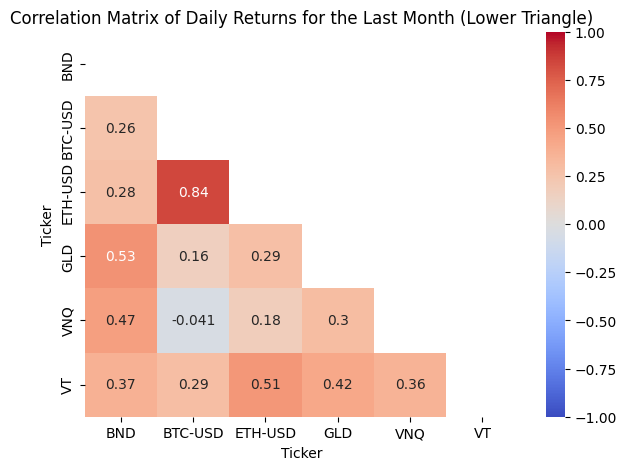

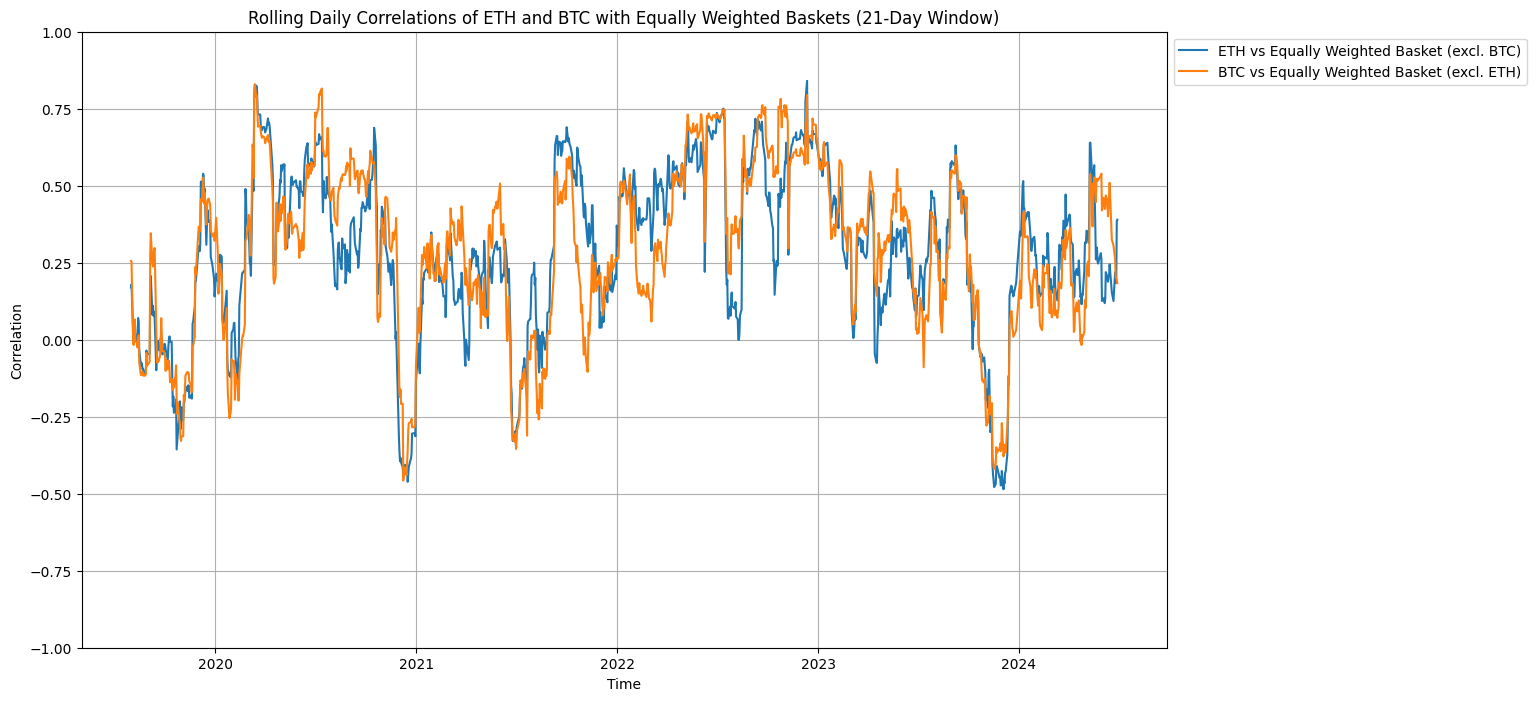

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define the tickers
tickers = {
    "BTC": "BTC-USD",
    "ETH": "ETH-USD",
    "Global Equities": "VT",  # Vanguard Total World Stock ETF as a proxy
    "Gold": "GLD",  # SPDR Gold Shares ETF as a proxy
    "Bonds": "BND",  # Vanguard Total Bond Market ETF as a proxy
    "REITs": "VNQ",  # Vanguard Real Estate ETF as a proxy
}

# Download the data
data = yf.download(list(tickers.values()), start="2019-07-01", end="2024-07-01")[
    "Adj Close"
]

# Resample data to business days and forward fill the missing data
data = data.resample("B").ffill()

# Drop columns with no data
data.dropna(axis=1, how="all", inplace=True)

# Calculate daily returns
daily_returns = data.pct_change(fill_method=None).dropna()

# Filter the data for the last month
last_month_data = daily_returns.iloc[-21:]

# Calculate the correlation matrix for the last month's daily returns
correlation_matrix_last_month = last_month_data.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix_last_month, dtype=bool))

# Plot the correlation matrix
plt.figure(figsize=(7, 5))
sns.heatmap(
    correlation_matrix_last_month,
    annot=True,
    mask=mask,
    cmap="coolwarm",
    vmin=-1,
    vmax=1,
)
plt.title("Correlation Matrix of Daily Returns for the Last Month (Lower Triangle)")
plt.show()

# Calculate equally weighted baskets excluding BTC and ETH
basket_ex_btc = daily_returns.drop(columns=["BTC-USD", "ETH-USD"]).mean(axis=1)
basket_ex_eth = daily_returns.drop(columns=["ETH-USD", "BTC-USD"]).mean(axis=1)

# Calculate rolling correlations using a one-month window (21 trading days)
rolling_window = 21  # 21 trading days for a 1-month rolling correlation
rolling_corr_eth = (
    daily_returns["ETH-USD"].rolling(window=rolling_window).corr(basket_ex_btc)
)
rolling_corr_btc = (
    daily_returns["BTC-USD"].rolling(window=rolling_window).corr(basket_ex_eth)
)

# Plot the rolling correlations
plt.figure(figsize=(14, 8))
plt.plot(
    rolling_corr_eth.index,
    rolling_corr_eth,
    label="ETH vs Equally Weighted Basket (excl. BTC)",
)
plt.plot(
    rolling_corr_btc.index,
    rolling_corr_btc,
    label="BTC vs Equally Weighted Basket (excl. ETH)",
)

plt.title(
    "Rolling Daily Correlations of ETH and BTC with Equally Weighted Baskets (21-Day Window)"
)
plt.xlabel("Time")
plt.ylabel("Correlation")
plt.ylim(-1, 1)
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=e3e450ef-1dc2-468f-9116-18b68ee623c5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>